In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
from scipy.stats import pearsonr
from scipy.stats import spearmanr

names = ['name',
         'rounds',
         'fPerc',
         'year',
         'avgDist',
         'gir',
         'avgPutt',
         'avgScram',
         'avgSco',
         'points',
         'wins',
         'top10',
         'avgSGPutts',
         'avgSGTot',
         'SG:OTT',
         'SG:APR',
         'SG:ARG',
         'money']

myAtt = ['fPerc','avgDist','gir','avgSco', 'SG:APR']
data = pd.read_csv("pgaTourData.csv")

<h2>Missing data & outliers</h2>

In [2]:
for att in myAtt:
    if data[att].dtype == "int64" or data[att].dtype == "float64":
        print('Analysis of ' + att)
        print("Equal to zero")
        print((data[att] == 0).sum())
        print("Less than zero")
        print((data[att] < 0).sum())
        print("Standard deviation")
        print(data[att].std())
        print("Mean")
        print(data[att].mean())
        print("Null values")
        print(data[att].isnull().sum())
        print('---------------------------')



Analysis of fPerc
Equal to zero
0
Less than zero
0
Standard deviation
5.0588448007033415
Mean
61.44056019070325
Null values
634
---------------------------
Analysis of avgDist
Equal to zero
0
Less than zero
0
Standard deviation
8.91663138981873
Mean
290.80768772347966
Null values
634
---------------------------
Analysis of gir
Equal to zero
0
Less than zero
0
Standard deviation
2.7454109152950843
Mean
65.66167461263407
Null values
634
---------------------------
Analysis of avgSco
Equal to zero
0
Less than zero
0
Standard deviation
0.6983053997843278
Mean
70.92196066746129
Null values
634
---------------------------
Analysis of SG:APR
Equal to zero
1
Less than zero
682
Standard deviation
0.3809522924878897
Mean
0.06501489868891548
Null values
634
---------------------------


<h2>Cleaning data</h2>

In [3]:
#Cleaning the data
#Only the players with wins have data in the wins columns
data['wins'].fillna(0, inplace=True)
data.dropna(subset=myAtt,inplace=True)

<h2>Data description</h2>

In [4]:
print(data[myAtt].skew())
print(data[myAtt].kurtosis())
data[myAtt].describe()

fPerc     -0.014023
avgDist    0.244753
gir       -0.318391
avgSco     0.167981
SG:APR    -0.272907
dtype: float64
fPerc     -0.113707
avgDist   -0.026744
gir        0.422506
avgSco     1.079183
SG:APR     0.842411
dtype: float64


,fPerc,avgDist,gir,avgSco,SG:APR
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,61.440560,290.807688,65.661675,70.921961,0.065015
std,5.058845,8.916631,2.745411,0.698305,0.380952
min,43.020000,266.400000,53.540000,68.698000,-1.680000
25%,57.942500,284.900000,63.830000,70.494250,-0.180750
50%,61.430000,290.550000,65.790000,70.902000,0.081000
75%,64.910000,296.400000,67.580000,71.342750,0.314500
max,76.880000,319.700000,73.520000,74.400000,1.533000


<h2>Comparing longest and shortest hitters</h2>

In [5]:
minMaxDist = data[(data['avgDist'] == data['avgDist'].max()) | (data['avgDist'] == data['avgDist'].min())]
#Pretty prints
minMaxDist

,name,rounds,fPerc,year,avgDist,gir,avgPutt,avgScram,avgSco,points,wins,top10,avgSGPutts,avgSGTot,SG:OTT,SG:APR,SG:ARG,money
0,Rory McIlroy,64.0,55.79,2018,319.7,66.30,28.46,62.97,69.303,"1,154",1.0,5.0,0.06,1.412,0.761,0.269,0.322,"$4,410,296"
1677,Brian Gay,101.0,74.00,2010,266.4,63.44,28.02,66.51,70.756,714,0.0,2.0,0.73,0.518,-0.597,0.159,0.228,"1,521,663"


<h2>Histograms</h2>

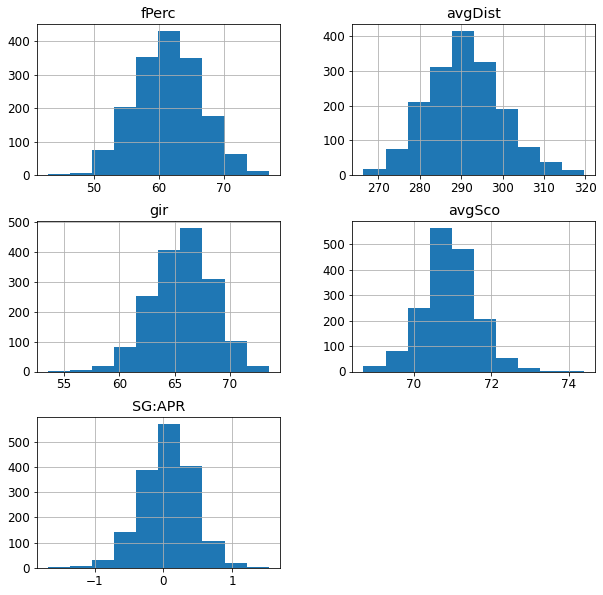

In [6]:
plt.rc('font', size=12)
data[myAtt].hist(figsize=(10,10))
plt.show()

<h2>Density plots</h2>

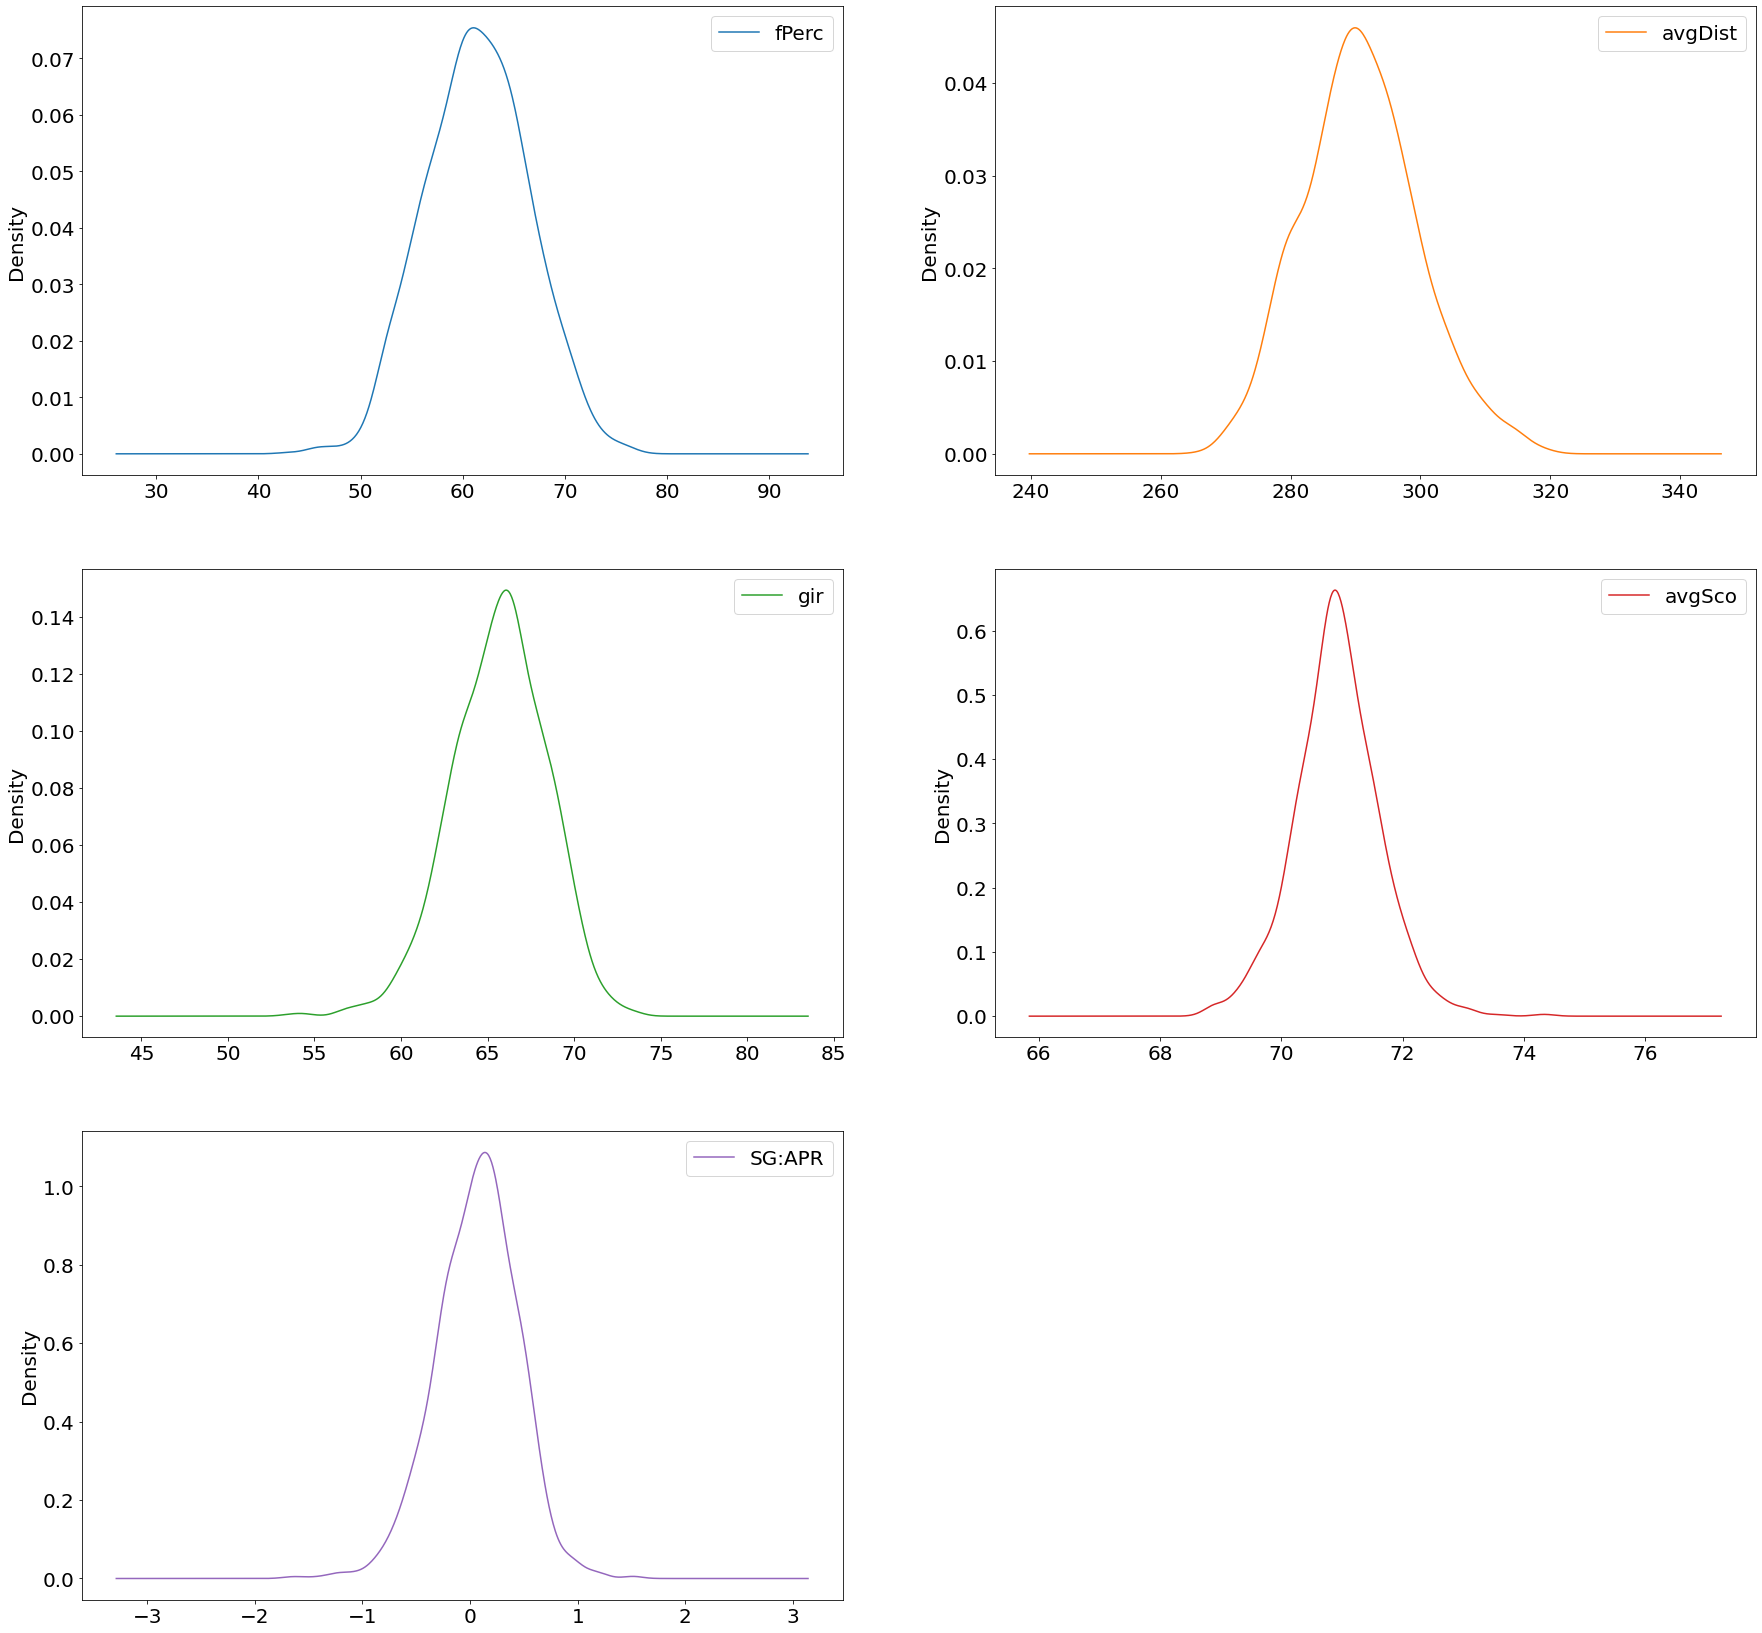

In [7]:
# Density Plots
plt.rc('font', size =20)
data[myAtt].plot(kind='density', subplots=True, layout=(5,2), sharex=False,figsize=(30,50))
plt.show()

<h2>Save the cleaned data</h2>

In [8]:
data.to_csv("pga_cleaned.csv", header=False)

<h2>Scatter plot</h2>

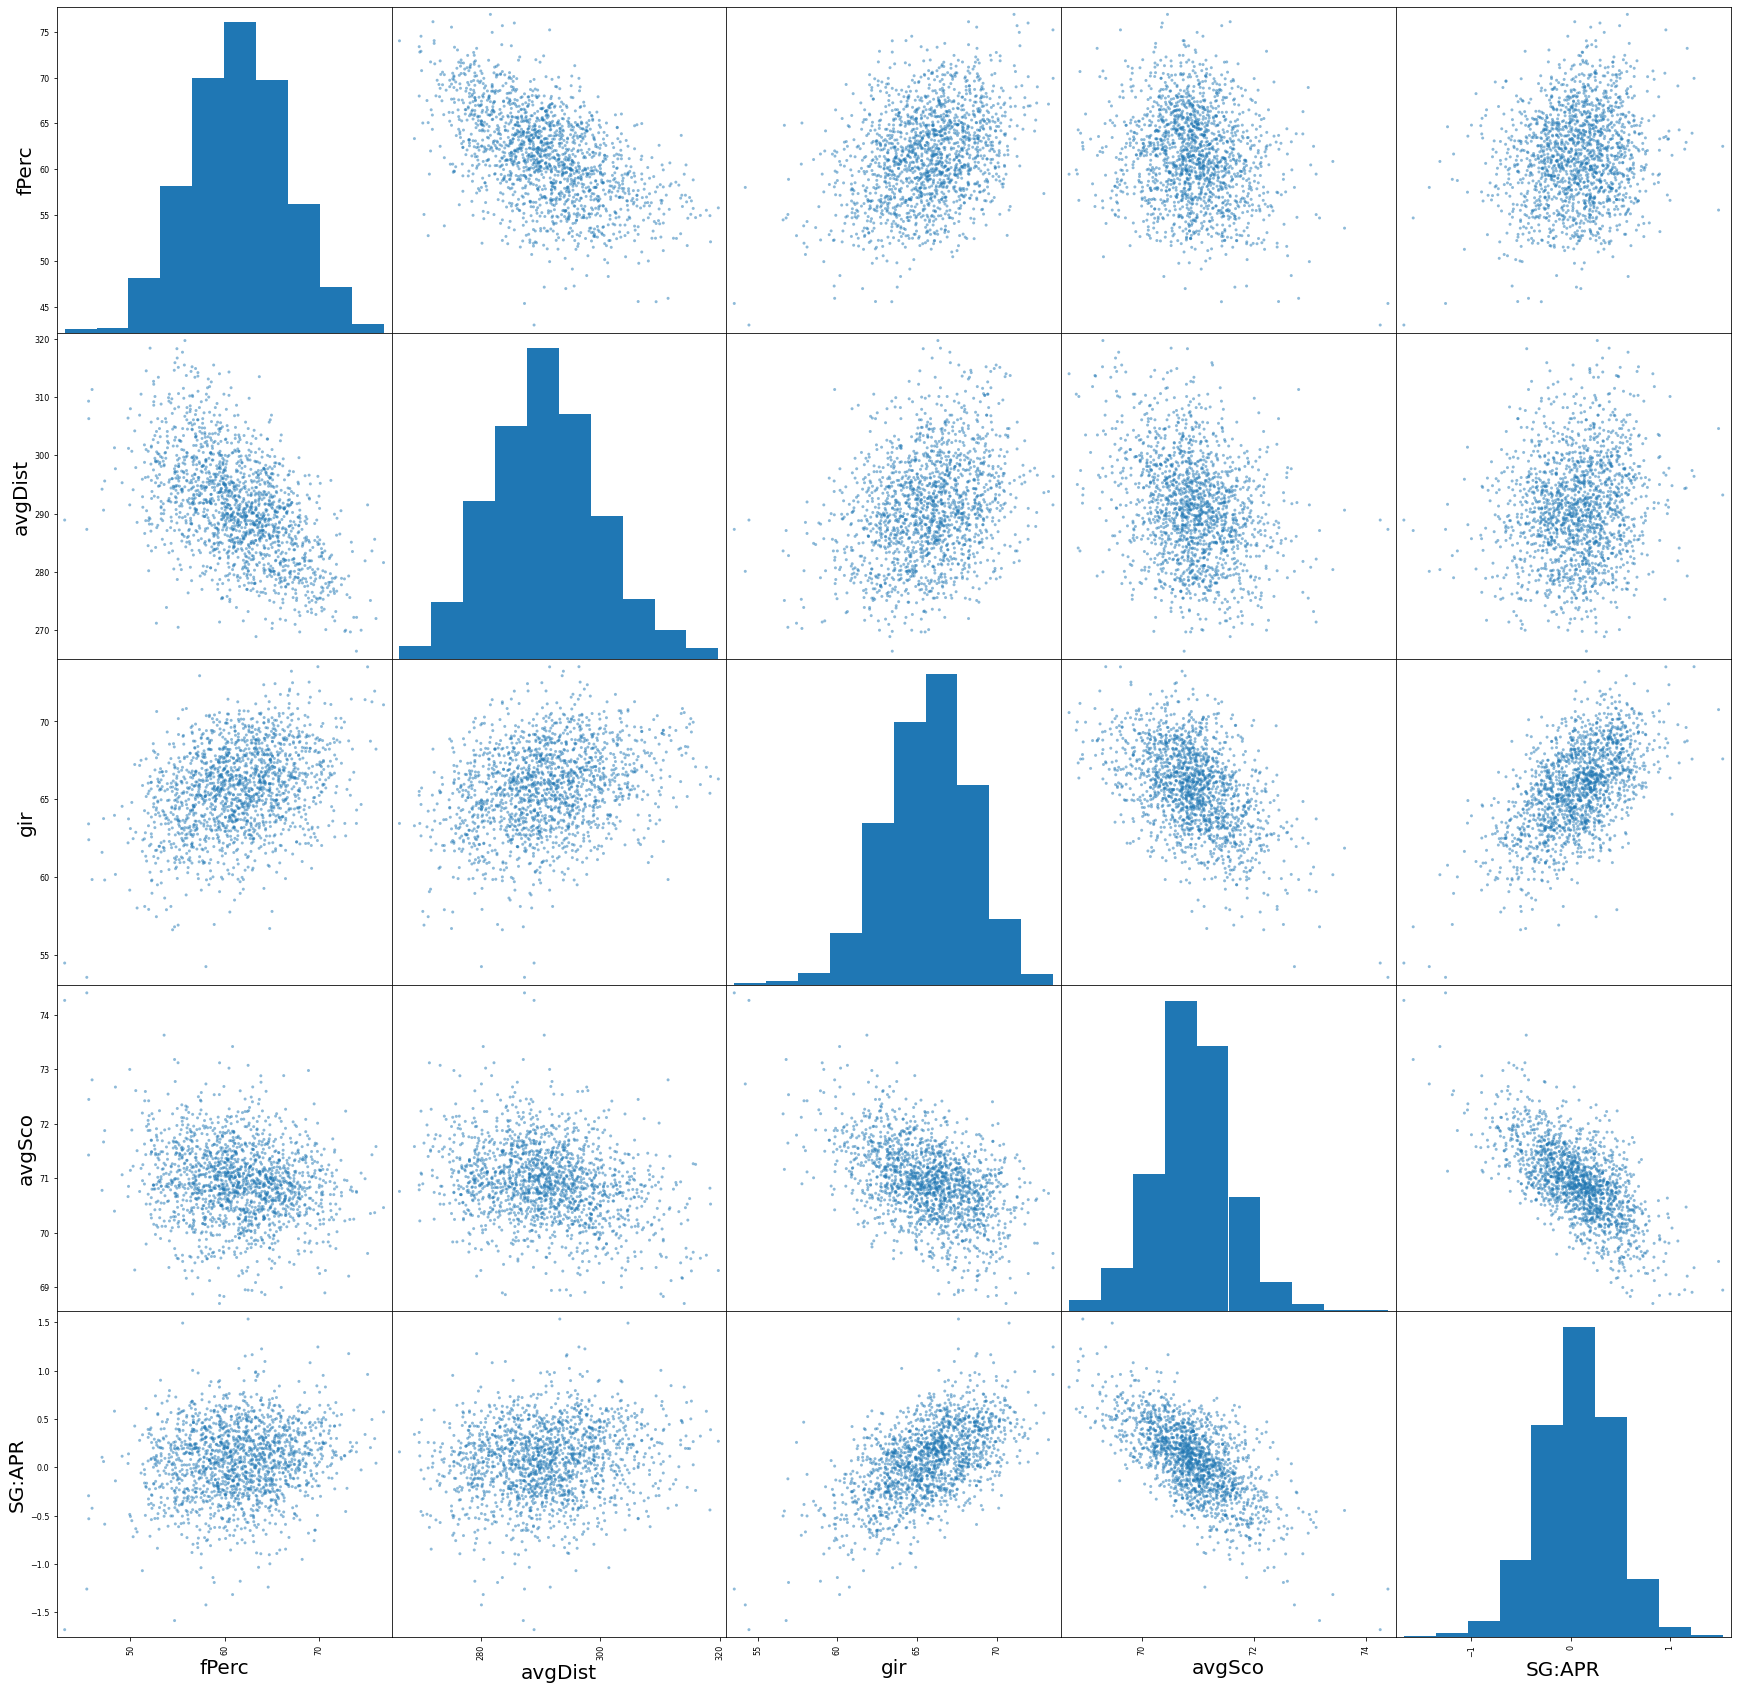

In [9]:
# Scatter Plot
plt.rc('font', size =20)
pd.plotting.scatter_matrix(data[myAtt], figsize=(30,30), alpha=0.5)

plt.show()

<h2>Average distance over the years</h2>

year
2010    287.513542
2011    291.089785
2012    290.053927
2013    287.921667
2014    290.016949
2015    290.301087
2016    290.898919
2017    292.570000
2018    296.636269
Name: avgDist, dtype: float64


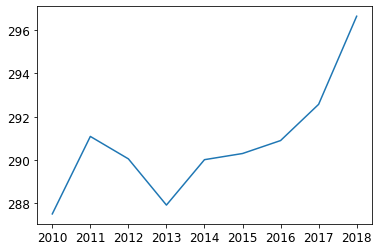

In [10]:

avgDist = data.groupby('year')['avgDist'].mean()
print(avgDist)

plt.rc('font', size =12)
plt.plot(avgDist)
plt.show()

<h2>Hypothesis & correlation tests 1</h2>

In [11]:
#Use Spearman's correlation test because it doesn't assume equal variance
x = data['avgDist']
y = data['SG:APR']
stat, p = spearmanr(x, y)
# stat, p = pearsonr(x, y)
print('stat=', stat)
print('p=', p)
#Change
if p > 0.05:
	print('Probably independent')
else:
	print('Proabably dependent')

print('T-test: p = ' + str(sc.ttest_ind(x.values, y.values, equal_var=False)[1]))


stat= 0.13204432856155848
p= 5.6753342143560135e-08
Proabably dependent
T-test: p = 0.0


<h2>Hypothesis & correlation tests 2</h2>

In [12]:
x = data['avgDist']
y = data['fPerc']
stat, p = spearmanr(x, y)
# stat, p = pearsonr(x, y)
print('stat=', stat)
print('p=', p)
if p > 0.05:
	print('Probably independent')
else:
	print('Proabably dependent')

print('T-test: p = ' + str(sc.ttest_ind(x.values, y.values, equal_var=False)[1]))


stat= -0.5294498746200068
p= 7.071771106378463e-122
Proabably dependent
T-test: p = 0.0


<h2>Correlation Table</h2>

In [13]:
myAtt = ['avgDist','SG:APR', 'fPerc']
print("Correlation Table")
corr = data[myAtt].corr()
corr.style.background_gradient().set_precision(2)

Correlation Table


,avgDist,SG:APR,fPerc
avgDist,1.00,0.14,-0.53
SG:APR,0.14,1.00,0.16
fPerc,-0.53,0.16,1.00


<h2>Small scatter plot</h2>

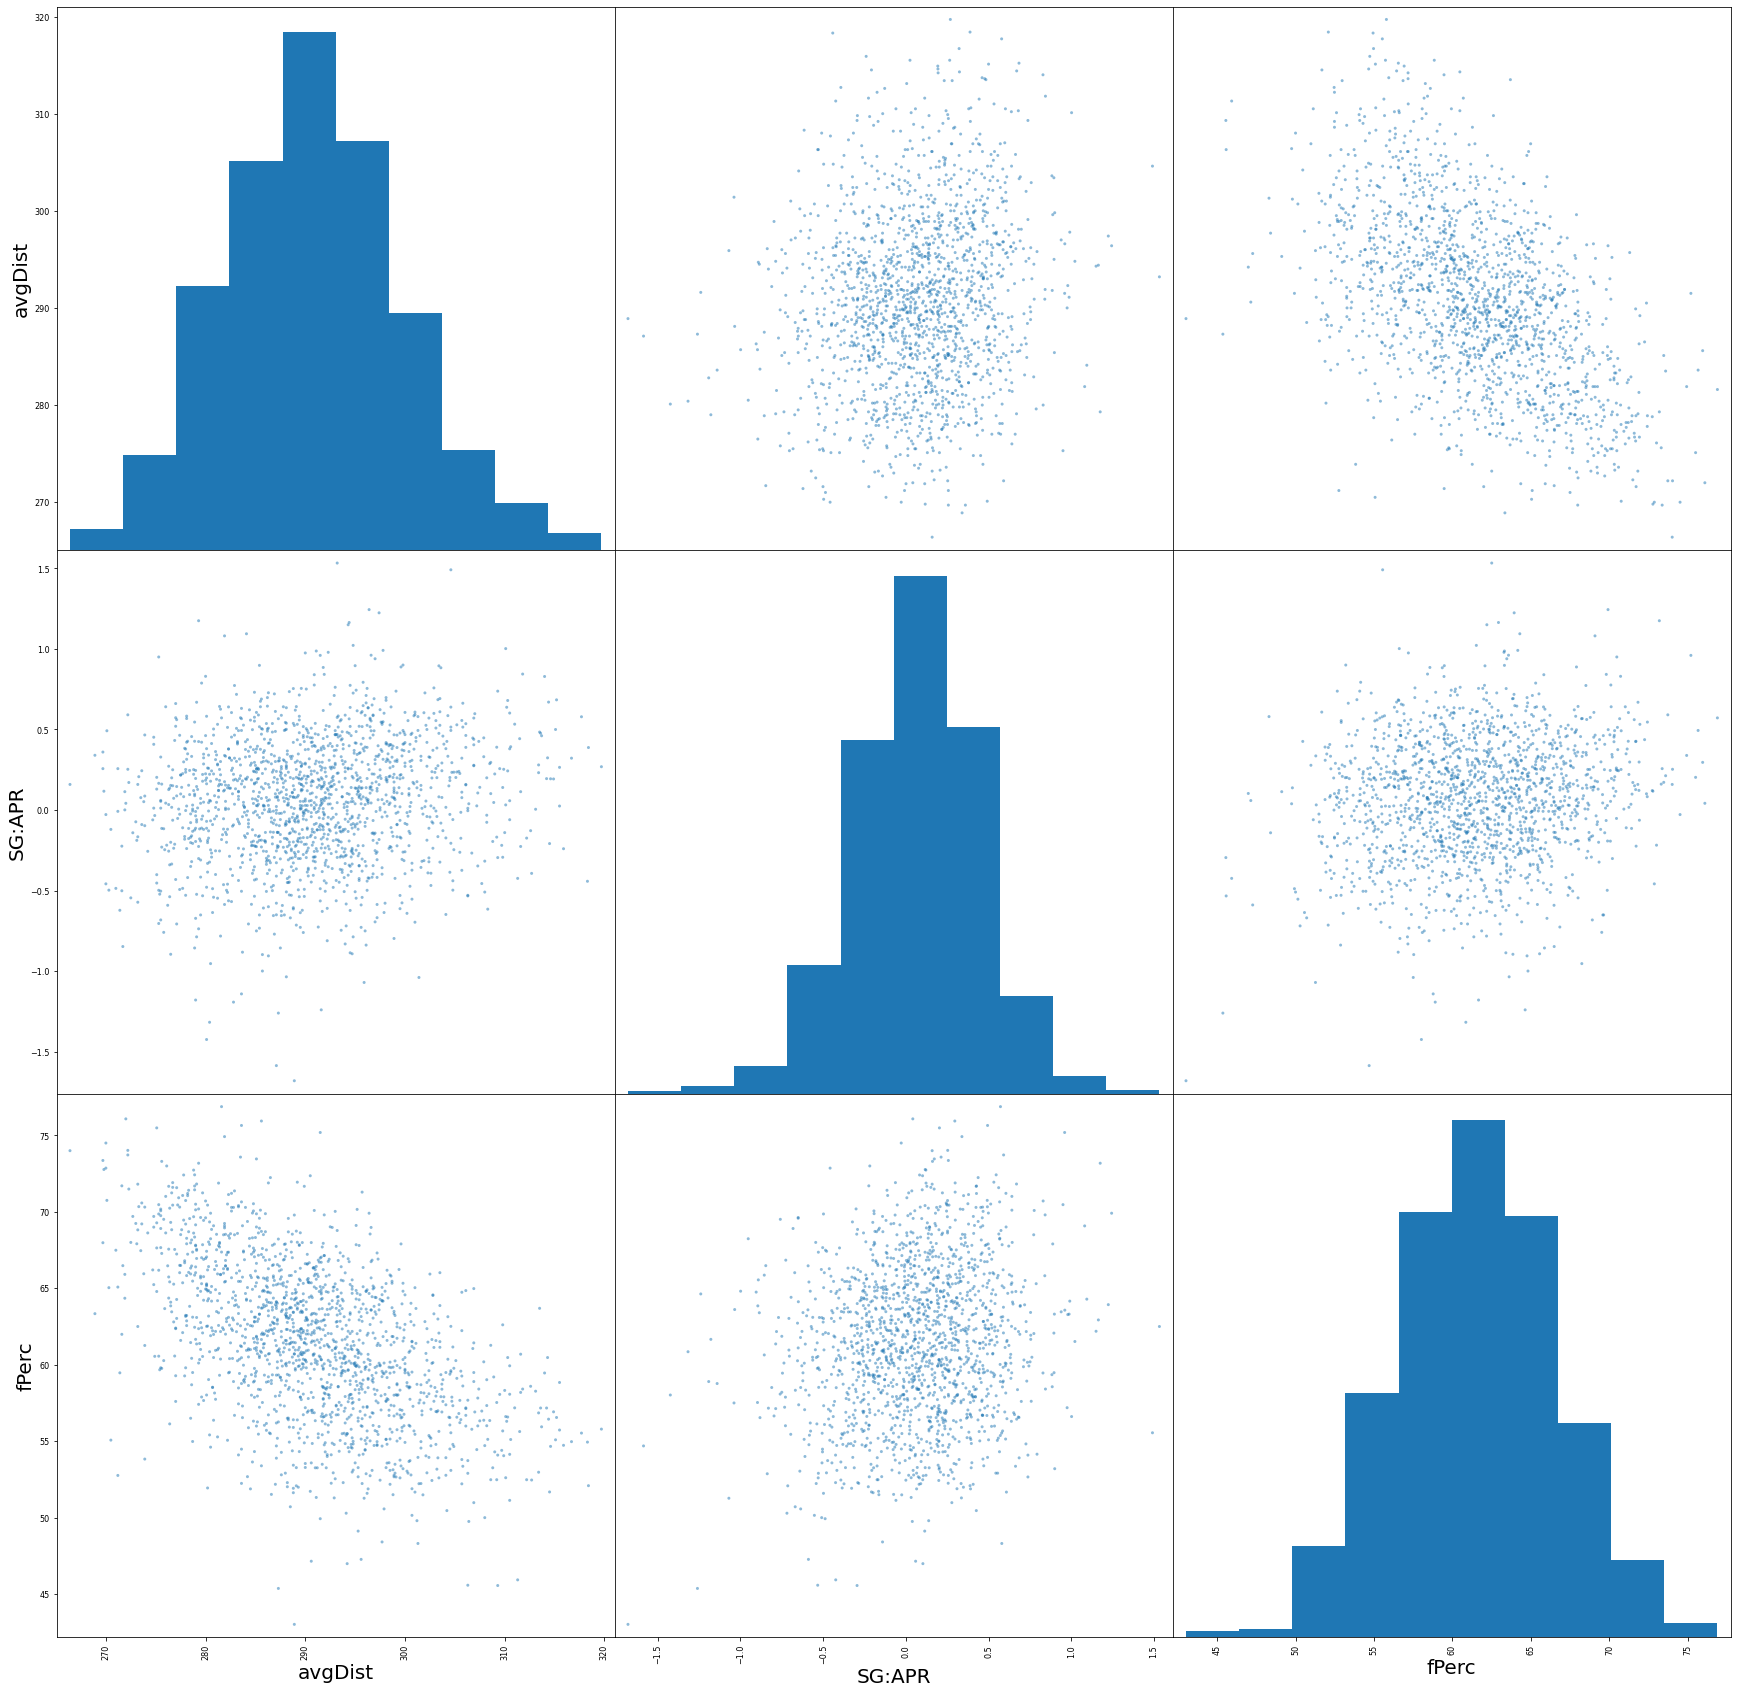

In [14]:
# Scatter Plot
plt.rc('font', size =20)
pd.plotting.scatter_matrix(data[myAtt], figsize=(30,30), alpha=0.5)

plt.show()